# 해상도에 따른 속도 차이 및 성능 실험

## 해상도별 폴더 저장

In [1]:
import cv2
from pathlib import Path
from tqdm import tqdm

# 입력 영상
INPUT_VIDEO = "/workspace/nas203/ds_RehabilitationMedicineData/data/김원 보산진 연구/M04_VISIT6_상지.MP4"

# 출력 루트 디렉토리
OUTPUT_ROOT = Path("./data/test/resolution_test")

# 테스트할 해상도 목록 (width, height)
RESOLUTIONS = {
    "original": None,        # 원본 해상도 추가
    "720p": (1280, 720),
    "360p": (640, 360),
    "180p": (320, 180)
}


# 추출할 구간 (초 단위)
DURATION = 20  # 앞 20초만

def resize_and_extract_frames(input_path, output_root, resolutions, duration_sec):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"✗ 열 수 없음: {input_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)              # 초당 프레임 수
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    max_frames = min(int(fps * duration_sec), total_frames)

    stem = Path(input_path).stem

    print(f"총 프레임 수: {total_frames}, FPS: {fps:.2f}, {duration_sec}초 → {max_frames}프레임 추출")

    for name, size in resolutions.items():
        out_dir = output_root / f"{stem}_{name}_{duration_sec}sec"
        out_dir.mkdir(parents=True, exist_ok=True)

        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        frame_idx = 0

        if size is None:
            print(f"▶ 해상도 {name} (원본) 프레임 추출 시작")
        else:
            width, height = size
            print(f"▶ 해상도 {name} ({width}x{height}) 변환 및 프레임 추출 시작")

        for _ in tqdm(range(max_frames), desc=f"{name} 변환", unit="frame"):
            ret, frame = cap.read()
            if not ret:
                break
            if size is not None:  # 리사이즈 필요할 때만
                frame = cv2.resize(frame, (width, height))
            frame_path = out_dir / f"frame_{frame_idx:06d}.jpg"
            cv2.imwrite(str(frame_path), frame)
            frame_idx += 1

        print(f"✓ 완료: {out_dir} (총 {frame_idx} 프레임 저장)")

    cap.release()


# 실행
resize_and_extract_frames(INPUT_VIDEO, OUTPUT_ROOT, RESOLUTIONS, DURATION)
print("앞 20초 변환 및 프레임 추출 완료!")


총 프레임 수: 11954, FPS: 29.97, 20초 → 599프레임 추출
▶ 해상도 original (원본) 프레임 추출 시작


original 변환: 100% 599/599 [01:57<00:00,  5.09frame/s]


✓ 완료: data/test/resolution_test/M04_VISIT6_상지_original_20sec (총 599 프레임 저장)
▶ 해상도 720p (1280x720) 변환 및 프레임 추출 시작


720p 변환:  70% 422/599 [00:17<00:07, 24.71frame/s]


KeyboardInterrupt: 

## 해상도별 sapiens 모델 시험

### 180p

In [ ]:
import subprocess
import time

INPUT = "./data/test/resolution_test/M04_VISIT6_상지_180p_20sec"
OUTPUT = "./data/test/resolution_test/M04_VISIT6_상지_180p_20sec_json"

start = time.perf_counter()  # 시작 시간 기록

subprocess.run([
    "bash",
    "/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)

end = time.perf_counter()    # 종료 시간 기록
elapsed = end - start        # 경과 시간 (초)

print(f"실행 시간: {elapsed:.2f}초")


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh: line 5: fg: no job control


Distributing 599 image paths into 1 jobs.


/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 599/599 [15:58<00:00,  1.60s/it]


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/ipynb
Processing complete.
Results saved to /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/Project_HCC_move/test/resolution_test/M04_VISIT6_상지_180p_20sec_json/sapiens_0.3b
실행 시간: 1004.66초


### 360p

In [ ]:
import subprocess
import time

INPUT = "./data/test/resolution_test/M04_VISIT6_상지_360p_20sec"
OUTPUT = "./data/test/resolution_test/M04_VISIT6_상지_360p_20sec_json"

start = time.perf_counter()  # 시작 시간 기록

subprocess.run([
    "bash",
    "/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)

end = time.perf_counter()    # 종료 시간 기록
elapsed = end - start        # 경과 시간 (초)

print(f"실행 시간: {elapsed:.2f}초")


Distributing 599 image paths into 1 jobs.


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh: line 5: fg: no job control
/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 599/599 [16:55<00:00,  1.70s/it]


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/ipynb
Processing complete.
Results saved to /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/Project_HCC_move/test/resolution_test/M04_VISIT6_상지_360p_20sec_json/sapiens_0.3b
실행 시간: 1027.39초


### 720p

In [ ]:
import subprocess
import time

INPUT = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_720p_20sec"
OUTPUT = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_720p_20sec_json"

start = time.perf_counter()  # 시작 시간 기록

subprocess.run([
    "bash",
    "/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)

end = time.perf_counter()    # 종료 시간 기록
elapsed = end - start        # 경과 시간 (초)

print(f"실행 시간: {elapsed:.2f}초")


Distributing 599 image paths into 1 jobs.


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/scripts/demo/local/keypoints17.sh: line 5: fg: no job control
/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 599/599 [17:27<00:00,  1.75s/it]


/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/ipynb
Processing complete.
Results saved to /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/Project_HCC_move/test/resolution_test/M04_VISIT6_상지_720p_20sec_json/sapiens_0.3b
실행 시간: 1059.10초


In [1]:
import subprocess
import time

INPUT = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec"
OUTPUT = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec_json"

start = time.perf_counter()  # 시작 시간 기록

subprocess.run([
    "bash",
    "../sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)

end = time.perf_counter()    # 종료 시간 기록
elapsed = end - start        # 경과 시간 (초)

print(f"실행 시간: {elapsed:.2f}초")


../sapiens/pose/scripts/demo/local/keypoints17.sh: line 3: fg: no job control


Distributing 599 image paths into 1 jobs.


/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 599/599 [20:00<00:00,  2.00s/it]


Processing complete.
Results saved to ../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec_json/sapiens_0.3b
실행 시간: 1211.07초


../sapiens/pose/scripts/demo/local/keypoints17.sh: line 96: cd: OLDPWD not set


## 시각화

### 생성된 json 상태 확인

In [ ]:
import json
sample_json = json.load(open("./data/test/resolution_test/M04_VISIT6_상지_180p_20sec_json/sapiens_0.3b/frame_000000.json"))
print(sample_json["instance_info"][0]["keypoints"])


[[143.73820558745786, 41.209163361379666], [146.36811045452123, 39.01459101717646], [142.01937683750583, 39.23080031676491], [153.2117428675956, 41.34790377365425], [139.071879458749, 41.32495667080066], [160.2689301183512, 54.228995713213564], [135.45546672244816, 56.744799289496285], [169.8734949887852, 74.44076119188], [129.9217087327928, 78.09690018072178], [170.28684945042178, 66.0155094362631], [126.3807640633508, 69.26946463367409], [159.04332806696843, 80.50141564751152], [142.3060130571181, 83.95300324677544], [166.9598752206011, 97.1469930074561], [138.52678523455955, 96.82120015970708], [173.72467238410786, 119.87727404769291], [138.3476365885593, 120.61408780980855]]


### 0, 50 frame에서 각 해상도별 랜드마크 시각화

599 599
599 599
599 599


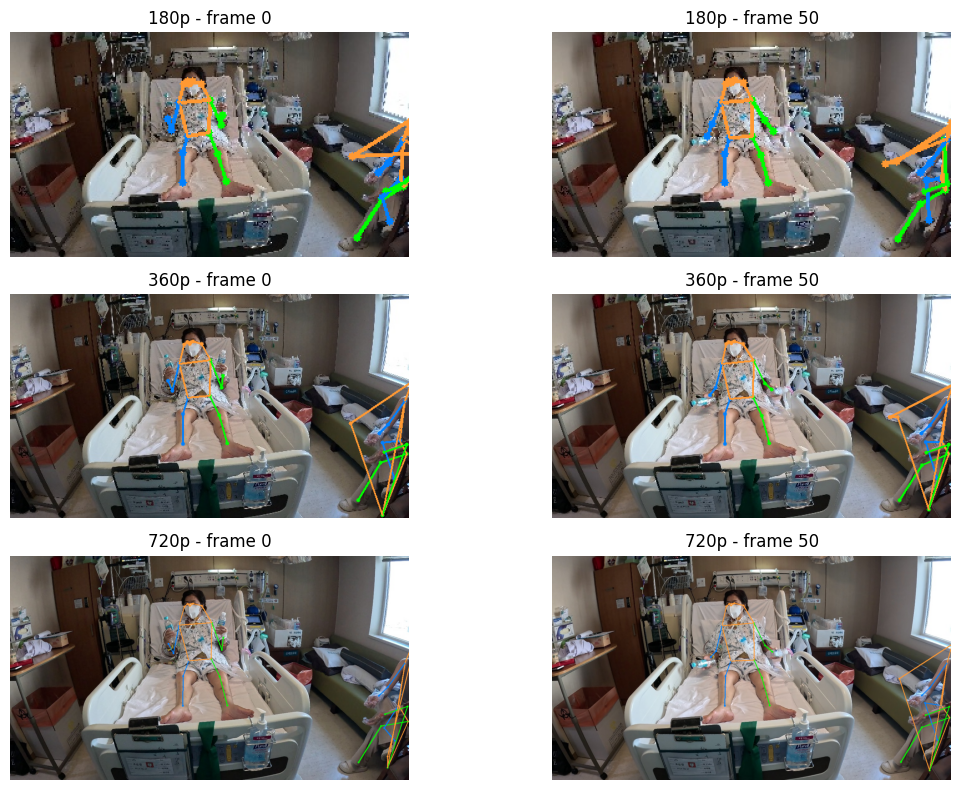

In [ ]:
import cv2, json, runpy
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# coco.py 불러오기 (dataset_info dict만 가져옴)
import runpy

dataset_info = runpy.run_path(
    "/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/configs/_base_/datasets/coco.py"
)["dataset_info"]

def draw_pose(frame, pred):
    kpt_meta = dataset_info["keypoint_info"]
    skeleton = dataset_info["skeleton_info"]

    instances = pred.get("instance_info", [])
    for person in instances:
        kpts = np.array(person["keypoints"])

        # JSON이 (x,y)만 있는 경우 → (x,y,1.0)으로 확장
        if kpts.ndim == 2 and kpts.shape[1] == 2:
            scores = np.ones((kpts.shape[0], 1))
            kpts = np.hstack([kpts, scores])
        elif kpts.ndim == 1 and len(kpts) % 2 == 0:
            kpts = kpts.reshape(-1, 2)
            scores = np.ones((kpts.shape[0], 1))
            kpts = np.hstack([kpts, scores])
        else:
            kpts = kpts.reshape(-1, 3)

        # --- keypoints ---
        for i, (x,y,score) in enumerate(kpts):
            if score > 0.3:  # threshold
                color = tuple(int(c) for c in kpt_meta[i]["color"])
                cv2.circle(frame, (int(x), int(y)), 3, color, -1)

        # --- skeleton ---
        for sk in skeleton.values():
            a = [k["id"] for k in kpt_meta.values() if k["name"] == sk["link"][0]][0]
            b = [k["id"] for k in kpt_meta.values() if k["name"] == sk["link"][1]][0]
            if kpts[a][2] > 0.3 and kpts[b][2] > 0.3:
                color = tuple(int(c) for c in sk["color"])
                cv2.line(frame, (int(kpts[a][0]), int(kpts[a][1])),
                               (int(kpts[b][0]), int(kpts[b][1])),
                               color, 2)
    return frame

def show_samples(frame_dir, json_dir, idx_list, title_prefix):
    frame_files = sorted(Path(frame_dir).glob("*.jpg"))
    json_files = sorted(Path(json_dir).glob("*.json"))
    print(len(frame_files), len(json_files))

    imgs = []
    for idx in idx_list:
        frame = cv2.imread(str(frame_files[idx]))
        with open(json_files[idx], "r") as f:
            pred = json.load(f)
        frame = draw_pose(frame, pred)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        imgs.append(frame_rgb)
    return imgs

# 경로 설정
base = "./data/test/resolution_test"
resolutions = {
    "180p": (f"{base}/M04_VISIT6_상지_180p_20sec", f"{base}/M04_VISIT6_상지_180p_20sec_json/sapiens_0.3b"),
    "360p": (f"{base}/M04_VISIT6_상지_360p_20sec", f"{base}/M04_VISIT6_상지_360p_20sec_json/sapiens_0.3b"),
    "720p": (f"{base}/M04_VISIT6_상지_720p_20sec", f"{base}/M04_VISIT6_상지_720p_20sec_json/sapiens_0.3b"),
}

# 보여줄 프레임 index (예: 첫 0번, 50번)
idx_list = [0, 50]

fig, axes = plt.subplots(len(resolutions), len(idx_list), figsize=(12, 8))

for row, (res, (fdir, jdir)) in enumerate(resolutions.items()):
    imgs = show_samples(fdir, jdir, idx_list, res)
    for col, img in enumerate(imgs):
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"{res} - frame {idx_list[col]}")
        axes[row, col].axis("off")

plt.tight_layout()
plt.show()


### overlay를 통한 skeleton 차이 확인

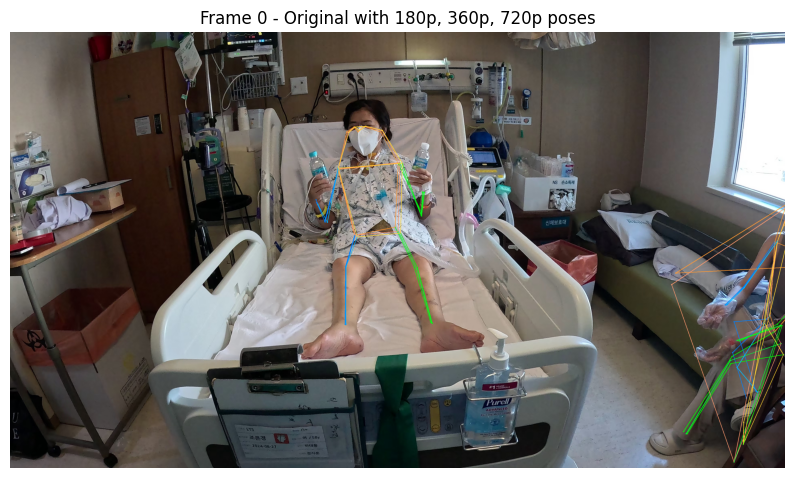

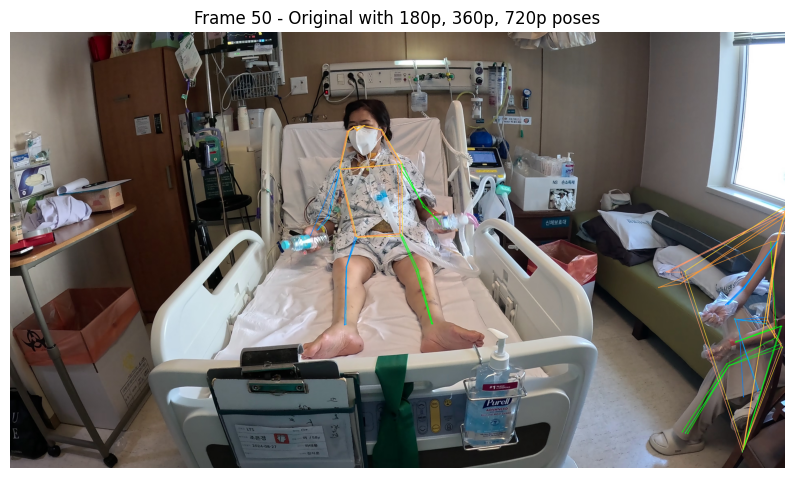

In [ ]:
import cv2, json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
# coco.py 불러오기 (dataset_info dict만 가져옴)
import runpy

dataset_info = runpy.run_path(
    "/workspace/nas100/forGPU2/Kimjihoo/3_project_HCCmove/sapiens/pose/configs/_base_/datasets/coco.py"
)["dataset_info"]

def draw_pose_scaled(frame, pred, src_size, dst_size, color_shift=(0,0,0)):
    """src_size 해상도 기준 keypoints를 dst_size 해상도로 스케일링 후 frame에 그리기"""
    kpt_meta = dataset_info["keypoint_info"]
    skeleton = dataset_info["skeleton_info"]

    scale_x = dst_size[0] / src_size[0]
    scale_y = dst_size[1] / src_size[1]

    instances = pred.get("instance_info", [])
    for person in instances:
        kpts = np.array(person["keypoints"])   # (17,2)

        # (x,y)만 있으면 score=1.0 추가 → (17,3)
        if kpts.ndim == 2 and kpts.shape[1] == 2:
            scores = np.ones((kpts.shape[0], 1))
            kpts = np.hstack([kpts, scores])

        # 스케일 보정
        kpts[:, 0] *= scale_x
        kpts[:, 1] *= scale_y

        # keypoints
        for i, (x,y,score) in enumerate(kpts):
            if score > 0.3:
                base_color = np.array(kpt_meta[i]["color"])
                color = tuple(int(c) for c in (base_color + color_shift).clip(0,255))
                cv2.circle(frame, (int(x), int(y)), 3, color, -1)

        # skeleton
        for sk in skeleton.values():
            a = [k["id"] for k in kpt_meta.values() if k["name"] == sk["link"][0]][0]
            b = [k["id"] for k in kpt_meta.values() if k["name"] == sk["link"][1]][0]
            if kpts[a][2] > 0.3 and kpts[b][2] > 0.3:
                base_color = np.array(sk["color"])
                color = tuple(int(c) for c in (base_color + color_shift).clip(0,255))
                cv2.line(frame, (int(kpts[a][0]), int(kpts[a][1])),
                               (int(kpts[b][0]), int(kpts[b][1])),
                               color, 2)

    return frame


def show_pose_all_res(original_dir, json_dirs, src_sizes, idx=0):
    """원본 프레임 위에 여러 해상도 JSON 결과를 스케일링해서 모두 표시"""
    frame_files = sorted(Path(original_dir).glob("*.jpg"))
    frame = cv2.imread(str(frame_files[idx]))
    H, W, _ = frame.shape
    dst_size = (W, H)

    # 색상 shift를 줘서 구분되도록 함
    color_shifts = {
        "180p": (0,0,0),      # 원래 색상
        "360p": (60,0,0),     # 살짝 빨간 기
        "720p": (0,60,0),     # 살짝 초록 기
    }

    for res, (json_dir, src_size) in json_dirs.items():
        json_files = sorted(Path(json_dir).glob("*.json"))
        with open(json_files[idx], "r") as f:
            pred = json.load(f)
        frame = draw_pose_scaled(frame, pred, src_size, dst_size, color_shift=color_shifts[res])

    plt.figure(figsize=(10,8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {idx} - Original with 180p, 360p, 720p poses")
    plt.axis("off")
    plt.show()

# ==============================
# 실행 예시
base = "./data/test/resolution_test"

original_dir = f"{base}/M04_VISIT6_상지_original_20sec"
json_dirs = {
    "180p": (f"{base}/M04_VISIT6_상지_180p_20sec_json/sapiens_0.3b", (320,180)),
    "360p": (f"{base}/M04_VISIT6_상지_360p_20sec_json/sapiens_0.3b", (640,360)),
    "720p": (f"{base}/M04_VISIT6_상지_720p_20sec_json/sapiens_0.3b", (1280,720)),
}


# 첫 프레임 비교
show_pose_all_res(original_dir, json_dirs, src_sizes=None, idx=0)

# 50번째 프레임 비교
show_pose_all_res(original_dir, json_dirs, src_sizes=None, idx=50)
